### 벅스뮤직 일간 차트 자료 크롤링
- 일자별 차트 100건 크롤링
- 시작일부터 종료일까지 차트 내용 가져오기
- 기간 내 가장 많이 등장한 아티스트, 곡 확인 및 시각화
- 곡에 대한 순위 변동 확인 및 시각화

In [5]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

#### 1등만 가져오기

In [24]:
url = "https://music.bugs.co.kr/chart/track/day/total?chartdate="
url = url + str(20220323)

html = requests.get(url)
soup = bs(html.text , "html.parser")

bugs_day=[]
tbody=soup.find("tbody")
tr_soup = tbody.find_all("tr")

rank = tr_soup[0].find("div",class_="ranking").get_text().split("\n")[1]
title = tr_soup[0].find("p",class_="title").get_text().replace("\n","")
art = tr_soup[0].find("p",class_="artist").get_text().replace("\n","")
album = tr_soup[0].find("a",class_="album").get_text().replace("\n","")
bugs_day.append([rank, title, art, album])
bugs_day

[['1', 'TOMBOY', '(여자)아이들', 'I NEVER DIE']]

전체 순위 가져오기

In [29]:
url = "https://music.bugs.co.kr/chart/track/day/total?chartdate="
url = url + str(20220323)

html = requests.get(url)
soup = bs(html.text , "html.parser")

bugs_day=[]
tbody=soup.find("tbody")
tr_soup = tbody.find_all("tr")

for tr in tr_soup:
    rank = tr.find("div",class_="ranking").get_text().split("\n")[1]
    title = tr.find("p",class_="title").get_text().replace("\n","")
    art = tr.find("p",class_="artist").get_text().replace("\n","")
    album = tr.find("a",class_="album").get_text().replace("\n","")
    bugs_day.append([rank, title, art, album])
df = pd.DataFrame(bugs_day, columns=["순위","곡명","아티스트","앨범"])
df

,순위,곡명,아티스트,앨범
0,1,TOMBOY,(여자)아이들,I NEVER DIE
1,2,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’
2,3,GANADARA (Feat. 아이유),박재범,GANADARA
3,4,사랑인가 봐,멜로망스(MeloMance),사랑인가 봐 (사내맞선 OST 스페셜 트랙)
4,5,INVU,태연 (TAEYEON),INVU - The 3rd Album
...,...,...,...,...
95,96,Diamonds (feat. 태용 of NCT),SURAN (수란),FLYIN' PART1
96,97,WA DA DA,Kep1er (케플러),FIRST IMPACT
97,98,Stardust love song,지효 (TWICE),스물다섯 스물하나 OST Part 6
98,99,소주 한 잔,양다일,소주 한 잔


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      100 non-null    object
 1   곡명      100 non-null    object
 2   아티스트    100 non-null    object
 3   앨범      100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


#### 순위
|에 따른 점수
- 1등: 100점 / 100등: 1점

In [41]:
score = []
for i in range(100):
    score.append(101-int(df.loc[i,"순위"]))
df["점수"] = score
df

,순위,곡명,아티스트,앨범,점수
0,1,TOMBOY,(여자)아이들,I NEVER DIE,100
1,2,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’,99
2,3,GANADARA (Feat. 아이유),박재범,GANADARA,98
3,4,사랑인가 봐,멜로망스(MeloMance),사랑인가 봐 (사내맞선 OST 스페셜 트랙),97
4,5,INVU,태연 (TAEYEON),INVU - The 3rd Album,96
...,...,...,...,...,...
95,96,Diamonds (feat. 태용 of NCT),SURAN (수란),FLYIN' PART1,5
96,97,WA DA DA,Kep1er (케플러),FIRST IMPACT,4
97,98,Stardust love song,지효 (TWICE),스물다섯 스물하나 OST Part 6,3
98,99,소주 한 잔,양다일,소주 한 잔,2


#### [미션] 특정 기간에 순위 크롤링
- 시작일/종료일 => 사용자로부터 입력받아 진행
- 기간 전체 순위 가져오기(2022-02-01 ~ 2022-03-23)
- 가져온 데이터는 DataFrame()

In [11]:
!pip install tqdm

In [14]:
# 시작일부터 종료일까지 날짜 생성하기
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
from tqdm import tqdm  # 진척도 체그, 거의 for문에서 in tqdm(~) 형식으로 사용

sDate = input("시작일 입력(예: 20220201)")
eDate = input("종료일 입력(예: 20220323)")
dates = pd.date_range(sDate,eDate)
dates=[i.strftime("%Y%m%d") for i in dates]
# print(dates)

df_bugs=pd.DataFrame()

for date in tqdm(dates):   # tqdm: 진척도 체크!!!
    url = "https://music.bugs.co.kr/chart/track/day/total?chartdate="
    url = url + date
    html = requests.get(url)
    soup = bs(html.text, "html.parser")
    tbody = soup.find("tbody")
    tr_soup = tbody.find_all("tr")
    scr=101
    bugs_day = []
    for tr in tr_soup:
        rank = tr.find("div",class_="ranking").get_text().split("\n")[1]
        title = tr.find("p",class_="title").get_text().replace("\n","")
        art = tr.find("p",class_="artist").get_text().replace("\n","")
        album = tr.find("a",class_="album").get_text().replace("\n","")
        scr -= 1
        bugs_day.append([date, rank,title,art,album,scr])
    
    # bugs_day
    df = pd.DataFrame(bugs_day,columns=["날짜","순위","곡명","아티스트","앨범","점수"])
    df_bugs= pd.concat([df_bugs,df])
df_bugs.reset_index(drop = True, inplace = True)  # concat마다 인덱스가 있으므로 리셋
#df_bugs = df_bugs.reset_indec(drop=True)
df_bugs.info()

시작일 입력(예: 20220201)20220201
종료일 입력(예: 20220323)20220323


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:34<00:00,  1.49it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      5100 non-null   object
 1   순위      5100 non-null   object
 2   곡명      5100 non-null   object
 3   아티스트    5100 non-null   object
 4   앨범      5100 non-null   object
 5   점수      5100 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 239.2+ KB


#### 특정 곡 조회 후 차트

In [15]:
df_bugs.head()

,날짜,순위,곡명,아티스트,앨범,점수
0,20220201,1,SMILEY (Feat. BIBI),YENA (최예나),ˣ‿ˣ (SMiLEY),100
1,20220201,2,ELEVEN,IVE (아이브),ELEVEN,99
2,20220201,3,Can't Control Myself,태연 (TAEYEON),Can't Control Myself,98
3,20220201,4,Step Back,GOT the beat,Step Back,97
4,20220201,5,Dreams Come True,aespa,Dreams Come True - SM STATION,96


In [17]:
df_bugs[df_bugs['순위']=="1"].head()

,날짜,순위,곡명,아티스트,앨범,점수
0,20220201,1,SMILEY (Feat. BIBI),YENA (최예나),ˣ‿ˣ (SMiLEY),100
100,20220202,1,SMILEY (Feat. BIBI),YENA (최예나),ˣ‿ˣ (SMiLEY),100
200,20220203,1,너 아니면 안돼,먼데이 키즈(Monday Kiz),너 아니면 안돼,100
300,20220204,1,대낮에 한 이별,선예\r선예\r,대낮에 한 이별,100
400,20220205,1,대낮에 한 이별,선예\r선예\r,대낮에 한 이별,100


In [27]:
df_at = df_bugs.groupby("아티스트")[["곡명"]].count()
dfat_10 = df_at.sort_values("곡명",ascending=False).head(10) # 내림차순 정렬
# 인덱스가 아티스트여서 바로 그릴 수 있음 #dfat_10.plot()

dfat_10 = dfat_10.reset_index()
dfat_10

,아티스트,곡명
0,태연 (TAEYEON),364
1,아이유(IU),353
2,aespa,180
3,BE'O (비오),173
4,방탄소년단,153
5,TREASURE(트레저),118
6,김기태,117
7,비투비,113
8,이무진,107
9,AKMU(악뮤),95


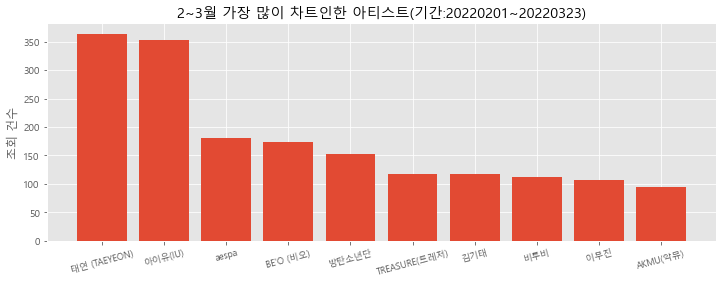

In [35]:
import matplotlib.pyplot as plt
import platform

if platform.system() == "Darwin": #맥
    plt.rc('font', family = "AppleGothic")
elif platform.system() == "Windows": #윈도우
    plt.rc('font', family = "Malgun Gothic")
elif platform.system() == "Linux": #리눅스 - 코랩
    plt.rc('font', family = "Malgun Gothic")


plt.style.use('ggplot')
plt.figure(figsize=(12,4))
plt.xticks(size=9, rotation=15)
plt.bar(dfat_10['아티스트'], dfat_10['곡명'])
plt.title(f"2~3월 가장 많이 차트인한 아티스트(기간:{sDate}~{eDate})")
plt.ylabel("조회 건수")
plt.show()


#### 가장 많이 나타난 아티스트(태연)의 노래 조회 건수

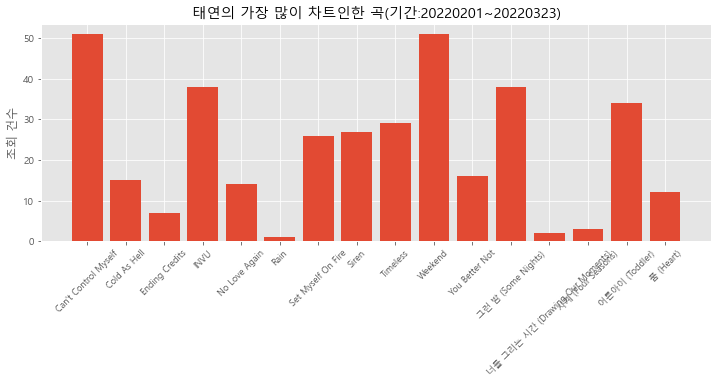

In [39]:
df_tae = df_bugs[df_bugs['아티스트']=="태연 (TAEYEON)"]
df_tit = df_tae.groupby("곡명")[["아티스트"]].count()

plt.style.use('ggplot')
plt.figure(figsize=(12,4))
plt.xticks(size=9, rotation=45)

plt.bar(df_tit.index, df_tit.아티스트)

plt.title(f"태연의 가장 많이 차트인한 곡(기간:{sDate}~{eDate})")
plt.ylabel("조회 건수")
plt.show()

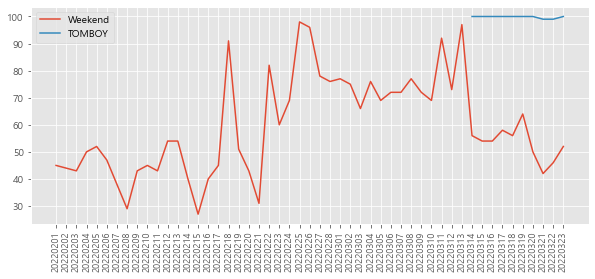

In [49]:
df_weekend = df_bugs[df_bugs['곡명']=="Weekend"]
df_tomboy = df_bugs[df_bugs['곡명']=="TOMBOY"]

plt.style.use("ggplot")

plt.figure(figsize = (10,4))
plt.plot(df_weekend.날짜,df_weekend.점수, label="Weekend")
plt.plot(df_tomboy.날짜,df_tomboy.점수, label="TOMBOY")
plt.xticks(size=9, rotation=90)
plt.legend()
plt.show()

# 아이유

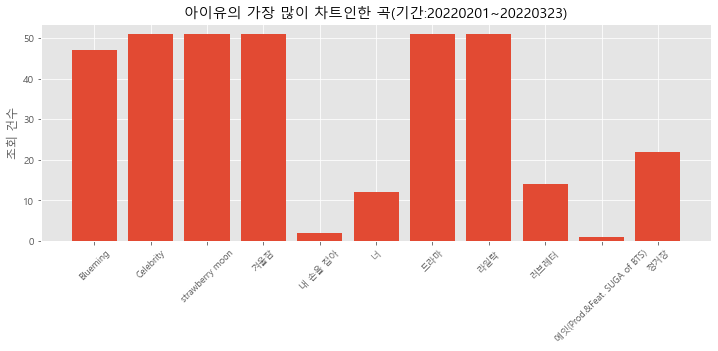

In [56]:
df_IU = df_bugs[df_bugs['아티스트']=="아이유(IU)"]
df_tit = df_IU.groupby("곡명")[["아티스트"]].count()

plt.style.use('ggplot')
plt.figure(figsize=(12,4))
plt.xticks(size=9, rotation=45)

plt.bar(df_tit.index, df_tit.아티스트)

plt.title(f"아이유의 가장 많이 차트인한 곡(기간:{sDate}~{eDate})")
plt.ylabel("조회 건수")
plt.show()

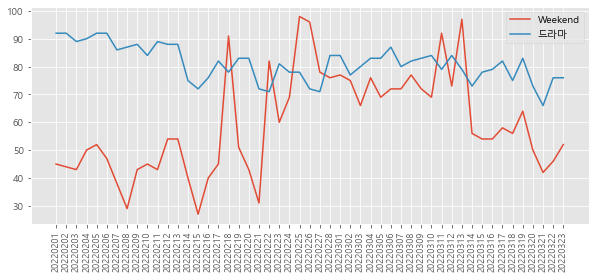

In [53]:
df_weekend = df_bugs[df_bugs['곡명']=="Weekend"]
df_drama = df_bugs[df_bugs['곡명']=="드라마"]

plt.style.use("ggplot")

plt.figure(figsize = (10,4))
plt.plot(df_weekend.날짜,df_weekend.점수, label="Weekend")
plt.plot(df_drama.날짜,df_drama.점수, label="드라마")
plt.xticks(size=9, rotation=90)
plt.legend()
plt.show()

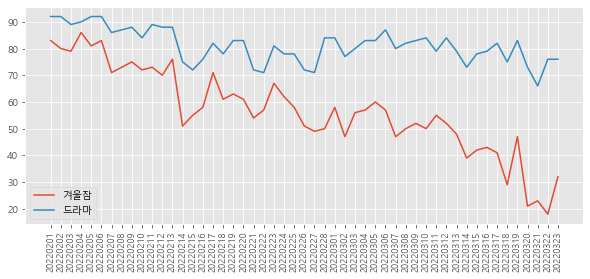

In [58]:
df_sleep = df_bugs[df_bugs['곡명']=="겨울잠"]
df_drama = df_bugs[df_bugs['곡명']=="드라마"]

plt.style.use("ggplot")

plt.figure(figsize = (10,4))
plt.plot(df_sleep.날짜,df_sleep.점수, label="겨울잠")
plt.plot(df_drama.날짜,df_drama.점수, label="드라마")
plt.xticks(size=9, rotation=90)
plt.legend()
plt.show()

In [57]:
df_IU["곡명"].unique() # 고유값 찾기

array(['드라마', '겨울잠', 'strawberry moon', 'Celebrity', '정거장', '라일락', '러브레터',
       '너', 'Blueming', '에잇(Prod.&Feat. SUGA of BTS)', '내 손을 잡아'],
      dtype=object)

### [미션] 1. 아티스트(아이유)의 곡들에 대한 일자별 순위변화 차트
- 곡 하나당 차트 하나
- 차트 하나에 모든 곡 표현

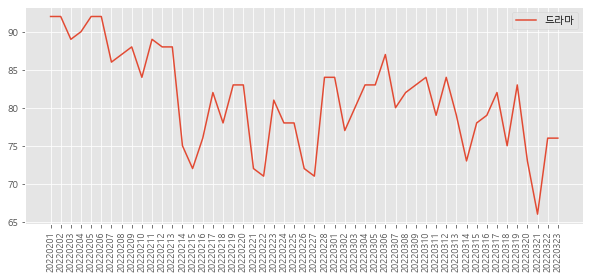

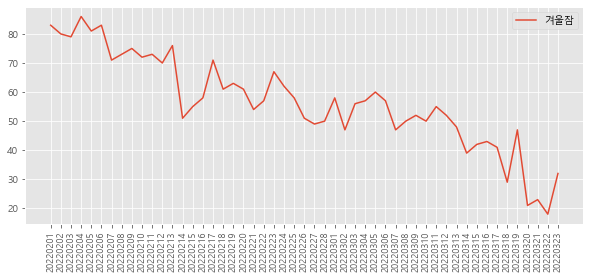

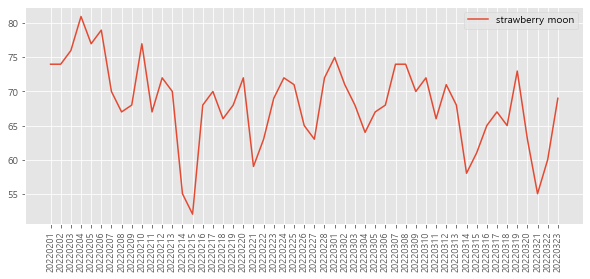

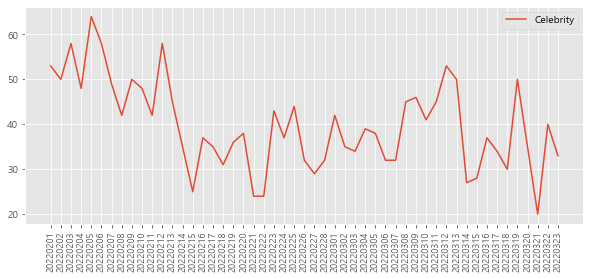

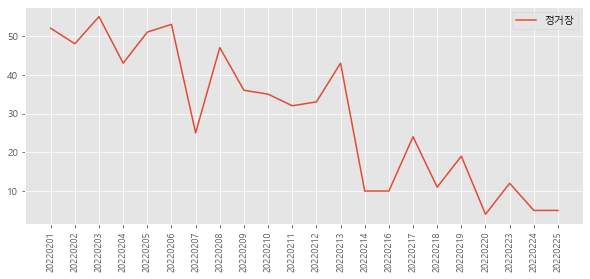

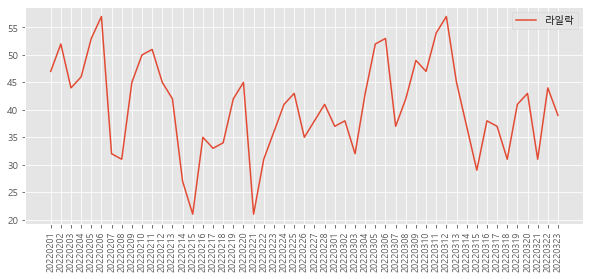

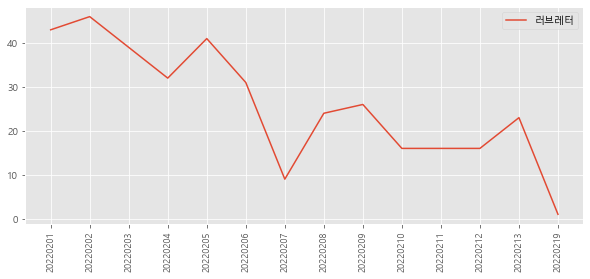

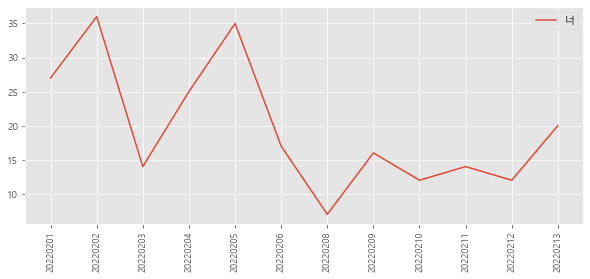

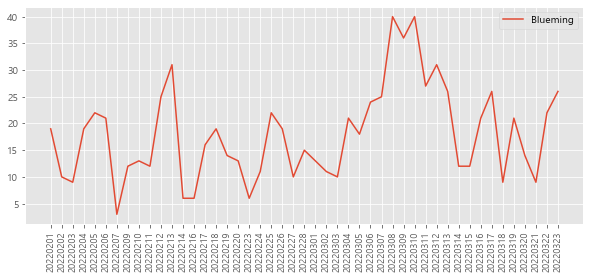

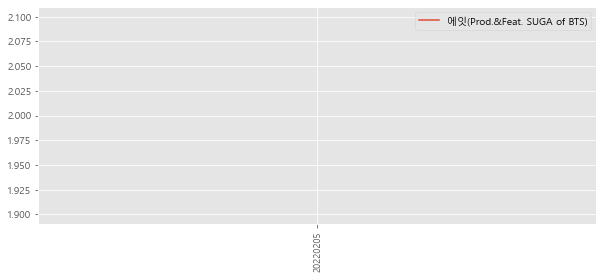

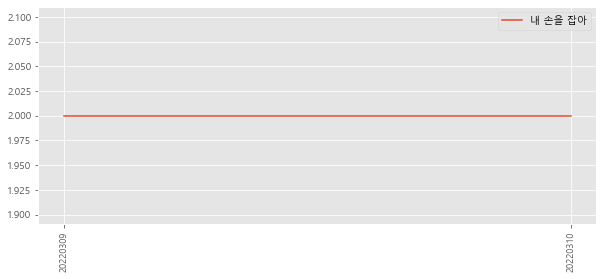

In [69]:
# 곡 하나당 차트 하나

for title in df_IU["곡명"].unique():
    df_song = df_bugs[df_bugs['곡명']==title]  

    plt.style.use("ggplot")
    plt.figure(figsize = (10,4))
    plt.plot(df_song.날짜,df_song.점수, label=f"{title}")
    plt.xticks(size=9, rotation=90)
    plt.legend()
    plt.show()

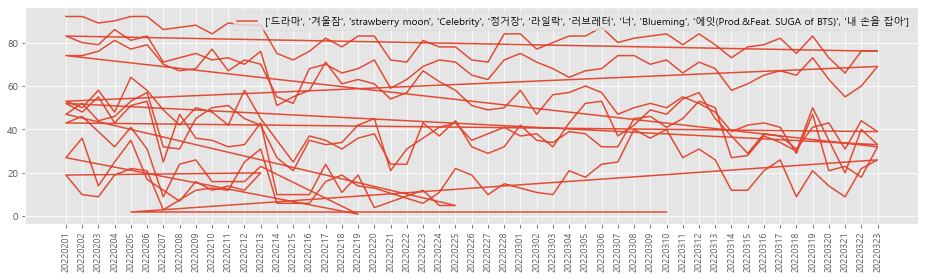

In [76]:
# 차트 하나에 모든 곡 표현
df_songs = pd.DataFrame()
titles=[]
df_IU = df_bugs[df_bugs['아티스트']=="아이유(IU)"]
for title in df_IU["곡명"].unique():
    df_song = df_bugs[df_bugs['곡명']==title]  
    df_songs = pd.concat([df_songs,df_song])
    titles.append(title)
plt.style.use("ggplot")
plt.figure(figsize = (16,4))
plt.plot(df_songs.날짜,df_songs.점수, label=f"{titles}")
plt.xticks(size=9, rotation=90)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


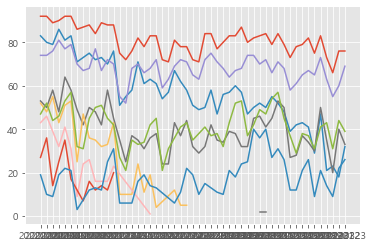

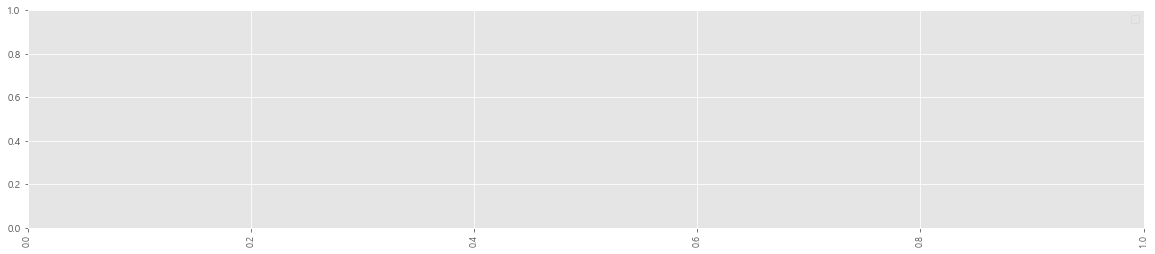

In [85]:
df_IU = df_bugs[df_bugs['아티스트']=="아이유(IU)"]
for title in df_IU["곡명"].unique():
    df_song = df_bugs[df_bugs['곡명']==title]
    plt.plot(df_song.날짜,df_song.점수, label=f"{title}")

plt.figure(figsize = (20,4))
plt.xticks(size=9, rotation=90)
plt.legend()
plt.show()

### [미션] 2. 아티스트와 곡명을 입력받아 순위변화 그래프 그리기

아티스트: 아이유(IU)
곡명: 드라마


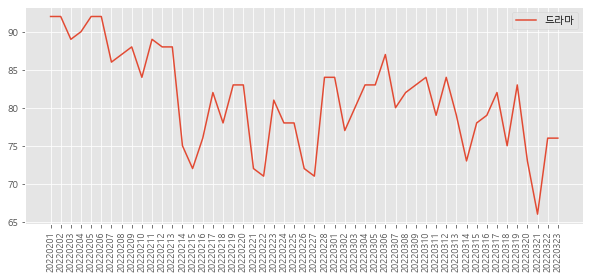

In [80]:
artist = str(input("아티스트: "))
title = str(input("곡명: "))

df_art = df_bugs[df_bugs['아티스트']==artist]
df_tit = df_bugs[df_bugs['곡명']==title]

plt.style.use("ggplot")
plt.figure(figsize = (10,4))
plt.plot(df_tit.날짜,df_tit.점수, label=f"{title}")
plt.xticks(size=9, rotation=90)
plt.legend()
plt.show()

In [87]:
df_bugs.to_csv("./bugs_20220201_20220323.csv",index=False)